In [2]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('style/elegant.mplstyle')
import numpy as np

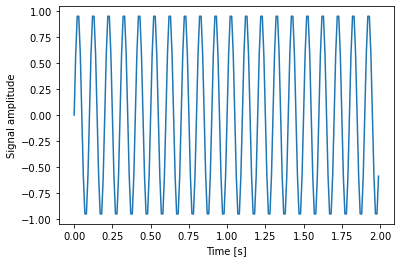

In [3]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

C:\Users\Ayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(-5.0, 110.0)

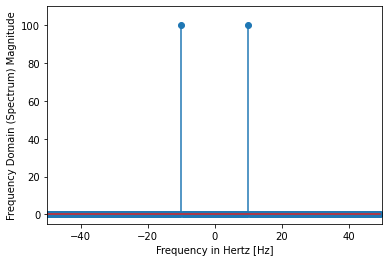

In [4]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

In [5]:
from IPython.display import Audio
Audio('Nightingale-sound.wav')

In [6]:
from scipy.io import wavfile
rate, audio = wavfile.read('Nightingale-sound.wav')

In [7]:
audio = np.mean(audio, axis=1)

Audio length: 30.51 seconds


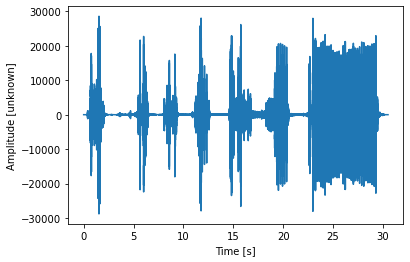

In [8]:
N = audio.shape[0]
L = N / rate

print(f'Audio length: {L:.2f} seconds')

f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]');

In [9]:
from skimage import util

M = 1024

slices = util.view_as_windows(audio, window_shape=(M,), step=100)
print(f'Audio shape: {audio.shape}, Sliced audio shape: {slices.shape}')

Audio shape: (1345536,), Sliced audio shape: (13446, 1024)


In [10]:
win = np.hanning(M + 1)[:-1]
slices = slices * win

In [11]:
slices = slices.T
print('Shape of `slices`:', slices.shape)

Shape of `slices`: (1024, 13446)


In [12]:
spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
spectrum = np.abs(spectrum)

C:\Users\Ayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


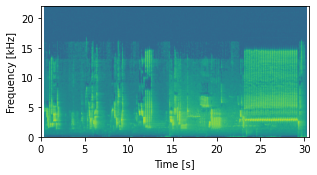

In [13]:
f, ax = plt.subplots(figsize=(4.8, 2.4))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

C:\Users\Ayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


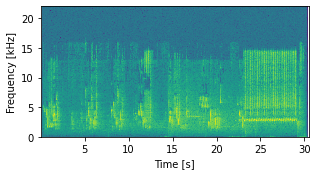

In [14]:
from scipy import signal

freqs, times, Sx = signal.spectrogram(audio, fs=rate, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

C:\Users\Ayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Ayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


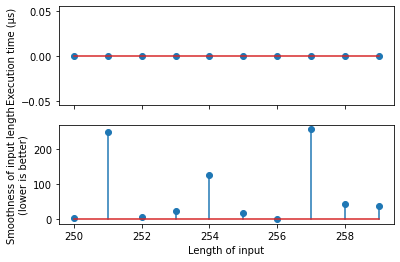

In [15]:
import time

from scipy import fftpack
from sympy import factorint

K = 1000
lengths = range(250, 260)

# Calculate the smoothness for all input lengths
smoothness = [max(factorint(i).keys()) for i in lengths]


exec_times = []
for i in lengths:
    z = np.random.random(i)

    # For each input length i, execute the FFT K times
    # and store the execution time

    times = []
    for k in range(K):
        tic = time.monotonic()
        fftpack.fft(z)
        toc = time.monotonic()
        times.append(toc - tic)

    # For each input length, remember the *minimum* execution time
    exec_times.append(min(times))


f, (ax0, ax1) = plt.subplots(2, 1, sharex=True)
ax0.stem(lengths, np.array(exec_times) * 10**6)
ax0.set_ylabel('Execution time (µs)')

ax1.stem(lengths, smoothness)
ax1.set_ylabel('Smoothness of input length\n(lower is better)')
ax1.set_xlabel('Length of input');

In [16]:
from scipy import fftpack
N = 10

fftpack.fft(np.ones(N))  # The first component is np.mean(x) * N

array([10.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,
        0.-0.j,  0.-0.j,  0.-0.j])

In [17]:
z = np.ones(10)
z[::2] = -1

print(f'Applying FFT to {z}')
fftpack.fft(z)

Applying FFT to [-1.  1. -1.  1. -1.  1. -1.  1. -1.  1.]


array([  0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,   0.+0.j, -10.+0.j,
         0.-0.j,   0.-0.j,   0.-0.j,   0.-0.j])

In [18]:
x = np.array([1, 5, 12, 7, 3, 0, 4, 3, 2, 8])
X = fftpack.fft(x)

np.set_printoptions(precision=2)

print("Real part:     ", X.real)
print("Imaginary part:", X.imag)

np.set_printoptions()

Real part:      [ 45.     7.09 -12.24  -4.09  -7.76  -1.    -7.76  -4.09 -12.24   7.09]
Imaginary part: [  0.   -10.96  -1.62  12.03   6.88   0.    -6.88 -12.03   1.62  10.96]


In [19]:
fftpack.fftfreq(10)

array([ 0. ,  0.1,  0.2,  0.3,  0.4, -0.5, -0.4, -0.3, -0.2, -0.1])

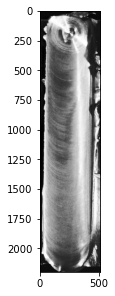

In [22]:
from skimage import io
image = io.imread('flash_1400-60.png')
#M, N = image.shape

f, ax = plt.subplots(figsize=(4.8, 4.8))
ax.imshow(image)

#print((M, N), image.dtype)

In [23]:
F = fftpack.fftn(image)

F_magnitude = np.abs(F)
F_magnitude = fftpack.fftshift(F_magnitude)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


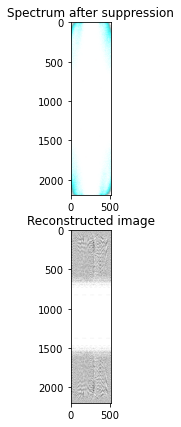

In [25]:
# Set block around center of spectrum to zero
K = 40
F_magnitude[M // 2 - K: M // 2 + K, N // 2 - K: N // 2 + K] = 0

# Find all peaks higher than the 98th percentile
peaks = F_magnitude < np.percentile(F_magnitude, 98)

# Shift the peaks back to align with the original spectrum
peaks = fftpack.ifftshift(peaks)

# Make a copy of the original (complex) spectrum
F_dim = F.copy()

# Set those peak coefficients to zero
F_dim = F_dim * peaks.astype(int)

# Do the inverse Fourier transform to get back to an image.
# Since we started with a real image, we only look at the real part of
# the output.
image_filtered = np.real(fftpack.ifft2(F_dim))

f, (ax0, ax1) = plt.subplots(2, 1, figsize=(4.8, 7))
ax0.imshow(np.log10(1 + np.abs(F_dim)), cmap='viridis')
ax0.set_title('Spectrum after suppression')

ax1.imshow(image_filtered)
ax1.set_title('Reconstructed image');

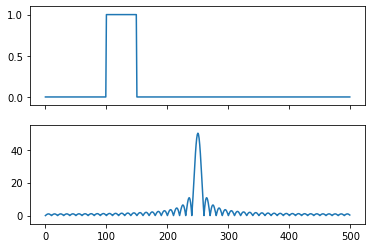

In [28]:
x = np.zeros(500)
x[100:150] = 1

X = fftpack.fft(x)

f, (ax0, ax1) = plt.subplots(2, 1, sharex=True)

ax0.plot(x)
ax0.set_ylim(-0.1, 1.1)

ax1.plot(fftpack.fftshift(np.abs(X)))
ax1.set_ylim(-5, 55);

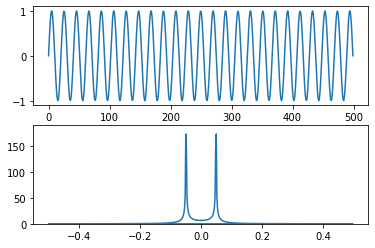

In [29]:
t = np.linspace(0, 1, 500)
x = np.sin(49 * np.pi * t)

X = fftpack.fft(x)

f, (ax0, ax1) = plt.subplots(2, 1)

ax0.plot(x)
ax0.set_ylim(-1.1, 1.1)

ax1.plot(fftpack.fftfreq(len(t)), np.abs(X))
ax1.set_ylim(0, 190);

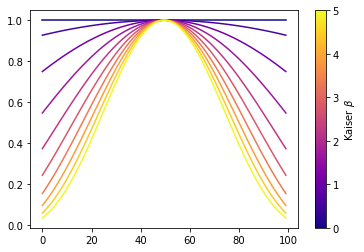

In [30]:
f, ax = plt.subplots()

N = 10
beta_max = 5
colormap = plt.cm.plasma

norm = plt.Normalize(vmin=0, vmax=beta_max)

lines = [
    ax.plot(np.kaiser(100, beta), color=colormap(norm(beta)))
    for beta in np.linspace(0, beta_max, N)
    ]

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)

sm._A = []

plt.colorbar(sm).set_label(r'Kaiser $\beta$');

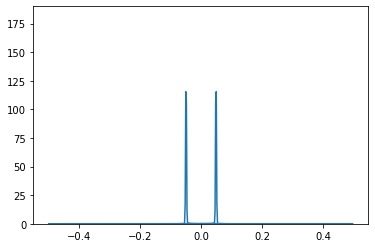

In [31]:
win = np.kaiser(len(t), 5)
X_win = fftpack.fft(x * win)

plt.plot(fftpack.fftfreq(len(t)), np.abs(X_win))
plt.ylim(0, 190);

In [32]:
pi = np.pi

# Radar parameters
fs = 78125          # Sampling frequency in Hz, i.e., we sample 78125
                    # times per second

ts = 1 / fs         # Sampling time, i.e., one sample is taken each
                    # ts seconds

Teff = 2048.0 * ts  # Total sampling time for 2048 samples
                    # (AKA effective sweep duration) in seconds.

Beff = 100e6        # Range of transmit signal frequency during the time the
                    # radar samples, known as the "effective bandwidth"
                    # (given in Hz)

S = Beff / Teff     # Frequency sweep rate in Hz/s

# Specification of targets.  We made these targets up, imagining they
# are objects seen by the radar with the specified range and size.

R = np.array([100, 137, 154, 159,  180])  # Ranges (in meter)
M = np.array([0.33, 0.2, 0.9, 0.02, 0.1])  # Target size
P = np.array([0, pi / 2, pi / 3, pi / 5, pi / 6])  # Randomly chosen phase offsets

t = np.arange(2048) * ts  # Sample times

fd = 2 * S * R / 3E8      # Frequency differences for these targets

# Generate five targets
signals = np.cos(2 * pi * fd * t[:, np.newaxis] + P)

# Save the signal associated with the first target as an example for
# later inspection
v_single = signals[:, 0]

# Weigh the signals, according to target size and sum, to generate
# the combined signal seen by the radar.
v_sim = np.sum(M * signals, axis=1)

## The above code is equivalent to:
#
# v0 = np.cos(2 * pi * fd[0] * t)
# v1 = np.cos(2 * pi * fd[1] * t + pi / 2)
# v2 = np.cos(2 * pi * fd[2] * t + pi / 3)
# v3 = np.cos(2 * pi * fd[3] * t + pi / 5)
# v4 = np.cos(2 * pi * fd[4] * t + pi / 6)
#
## Blend them together
# v_single = v0
# v_sim = (0.33 * v0) + (0.2 * v1) + (0.9 * v2) + (0.02 * v3) + (0.1 * v4)

In [33]:
data = np.load('radar_scan_0.npz')

# Load variable 'scan' from 'radar_scan_0.npz'
scan = data['scan']

# The dataset contains multiple measurements, each taken with the
# radar pointing in a different direction.  Here we take one such as
# measurement, at a specified azimuth (left-right position) and elevation
# (up-down position).  The measurement has shape (2048,).

v_actual = scan['samples'][5, 14, :]

# The signal amplitude ranges from -2.5V to +2.5V.  The 14-bit
# analogue-to-digital converter in the radar gives out integers
# between -8192 to 8192.  We convert back to voltage by multiplying by
# $(2.5 / 8192)$.

v_actual = v_actual * (2.5 / 8192)

In [34]:
azimuths = scan['position']['az']  # Get all azimuth measurements

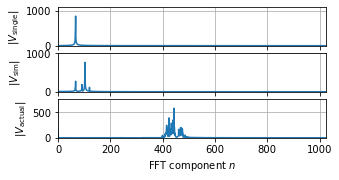

In [37]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(4.8, 2.4))

# Take FFTs of our signals.  Note the convention to name FFTs with a
# capital letter.

V_single = np.fft.fft(v_single)
V_sim = np.fft.fft(v_sim)
V_actual = np.fft.fft(v_actual)

N = len(V_single)

axes[0].plot(np.abs(V_single[:N // 2]))
axes[0].set_ylabel("$|V_\mathrm{single}|$")
axes[0].set_xlim(0, N // 2)
axes[0].set_ylim(0, 1100)

axes[1].plot(np.abs(V_sim[:N // 2]))
axes[1].set_ylabel("$|V_\mathrm{sim} |$")
axes[1].set_ylim(0, 1000)

axes[2].plot(np.abs(V_actual[:N // 2]))
axes[2].set_ylim(0, 750)
axes[2].set_ylabel("$|V_\mathrm{actual}|$")

axes[2].set_xlabel("FFT component $n$")

for ax in axes:
    ax.grid()

Text(0.5, 0, 'range')

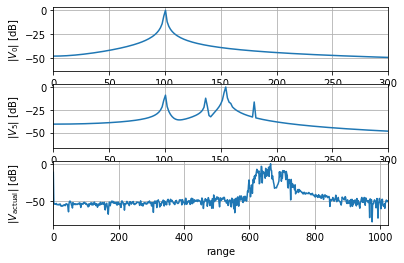

In [39]:
c = 3e8  # Approximately the speed of light and of
         # electromagnetic waves in air

fig, (ax0, ax1, ax2) = plt.subplots(3, 1)


def dB(y):
    "Calculate the log ratio of y / max(y) in decibel."

    y = np.abs(y)
    y /= y.max()

    return 20 * np.log10(y)


def log_plot_normalized(x, y, ylabel, ax):
    ax.plot(x, dB(y))
    ax.set_ylabel(ylabel)
    ax.grid()


rng = np.arange(N // 2) * c / 2 / Beff


log_plot_normalized(rng, V_single[:N // 2], "$|V_0|$ [dB]", ax0)
log_plot_normalized(rng, V_sim[:N // 2], "$|V_5|$ [dB]", ax1)
log_plot_normalized(rng, V_actual[:N // 2], "$|V_{\mathrm{actual}}|$ [dB]", ax2)

ax0.set_xlim(0, 300)  # Change x limits for these plots so that
ax1.set_xlim(0, 300)  # we are better able to see the shape of the peaks.
ax2.set_xlim(0, len(V_actual) // 2)
ax2.set_xlabel('range')

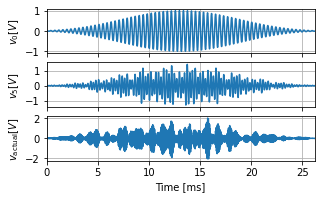

In [40]:
f, axes = plt.subplots(3, 1, sharex=True, figsize=(4.8, 2.8))

t_ms = t * 1000  # Sample times in milli-second

w = np.kaiser(N, 6.1)  # Kaiser window with beta = 6.1

for n, (signal, label) in enumerate([(v_single, r'$v_0 [V]$'),
                                     (v_sim, r'$v_5 [V]$'),
                                     (v_actual, r'$v_{\mathrm{actual}} [V]$')]):

    axes[n].plot(t_ms, w * signal)
    axes[n].set_ylabel(label)
    axes[n].grid()

axes[2].set_xlim(0, t_ms[-1])
axes[2].set_xlabel('Time [ms]');


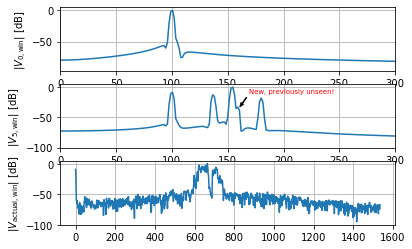

In [41]:
V_single_win = np.fft.fft(w * v_single)
V_sim_win = np.fft.fft(w * v_sim)
V_actual_win = np.fft.fft(w * v_actual)

fig, (ax0, ax1,ax2) = plt.subplots(3, 1)


log_plot_normalized(rng, V_single_win[:N // 2],
                        r"$|V_{0,\mathrm{win}}|$ [dB]", ax0)
log_plot_normalized(rng, V_sim_win[:N // 2],
                        r"$|V_{5,\mathrm{win}}|$ [dB]", ax1)
log_plot_normalized(rng, V_actual_win[:N // 2],
                        r"$|V_\mathrm{actual,win}|$ [dB]", ax2)

ax0.set_xlim(0, 300)  # Change x limits for these plots so that
ax1.set_xlim(0, 300)  # we are better able to see the shape of the peaks.

ax1.annotate("New, previously unseen!", (160, -35), xytext=(10, 15),
             textcoords="offset points", color='red', size='x-small',
             arrowprops=dict(width=0.5, headwidth=3, headlength=4,
                             fc='k', shrink=0.1));

(0.0, 1.0, 0.0, 1.0)

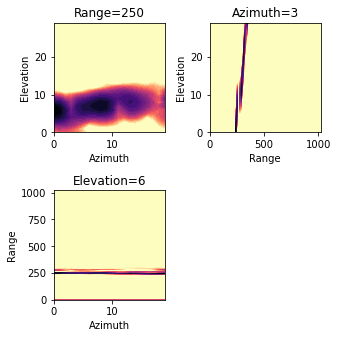

In [42]:
data = np.load('radar_scan_1.npz')
scan = data['scan']

# The signal amplitude ranges from -2.5V to +2.5V.  The 14-bit
# analogue-to-digital converter in the radar gives out integers
# between -8192 to 8192.  We convert back to voltage by multiplying by
# $(2.5 / 8192)$.

v = scan['samples'] * 2.5 / 8192
win = np.hanning(N + 1)[:-1]

# Take FFT for each measurement
V = np.fft.fft(v * win, axis=2)[::-1, :, :N // 2]

contours = np.arange(-40, 1, 2)

# ignore MPL layout warnings
import warnings
warnings.filterwarnings('ignore', '.*Axes.*compatible.*tight_layout.*')

f, axes = plt.subplots(2, 2, figsize=(4.8, 4.8), tight_layout=True)

labels = ('Range', 'Azimuth', 'Elevation')

def plot_slice(ax, radar_slice, title, xlabel, ylabel):
    ax.contourf(dB(radar_slice), contours, cmap='magma_r')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_facecolor(plt.cm.magma_r(-40))

plot_slice(axes[0, 0], V[:, :, 250], 'Range=250', 'Azimuth', 'Elevation')
plot_slice(axes[0, 1], V[:, 3, :], 'Azimuth=3', 'Range', 'Elevation')
plot_slice(axes[1, 0], V[6, :, :].T, 'Elevation=6', 'Azimuth', 'Range')
axes[1, 1].axis('off')

In [43]:
r = np.argmax(V, axis=2)

el, az = np.meshgrid(*[np.arange(s) for s in r.shape], indexing='ij')

axis_labels = ['Elevation', 'Azimuth', 'Range']
coords = np.column_stack((el.flat, az.flat, r.flat))

In [44]:
from scipy import spatial

d = spatial.Delaunay(coords[:, :2])
simplexes = coords[d.vertices]

In [45]:
coords = np.roll(coords, shift=-1, axis=1)
axis_labels = np.roll(axis_labels, shift=-1)

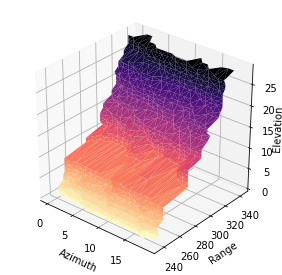

In [46]:
# This import initializes Matplotlib's 3D machinery
from mpl_toolkits.mplot3d import Axes3D

# Set up the 3D axis
f, ax = plt.subplots(1, 1, figsize=(4.8, 4.8),
                     subplot_kw=dict(projection='3d'))


ax.plot_trisurf(*coords.T, triangles=d.vertices, cmap='magma_r')

ax.set_xlabel(axis_labels[0])
ax.set_ylabel(axis_labels[1])
ax.set_zlabel(axis_labels[2], labelpad=-3)
ax.set_xticks([0, 5, 10, 15])

# Adjust the camera position to match our diagram above
ax.view_init(azim=-50);